<a href="https://colab.research.google.com/github/dhruvchakervarti/My-finance-codes/blob/master/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This program attempts to optimize using the Efficient frontier

In [5]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [6]:
# Get stock tickers 
assets = ['FB','AMZN','AAPL','NFLX','GOOG'] #FAANG
# Assign weights to stocks in the portfolio
weights = np.array([0.2,0.2,0.2,0.2,0.2])
# Get the portoflio starting date
stockStartDate = '2013-01-01'
# Get portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-08-06'

In [7]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [8]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-07-31,253.669998,3164.679932,425.040009,488.880005,1482.959961
2020-08-03,251.960007,3111.889893,435.750000,498.619995,1474.449951
2020-08-04,249.830002,3138.830078,438.660004,509.640015,1464.969971


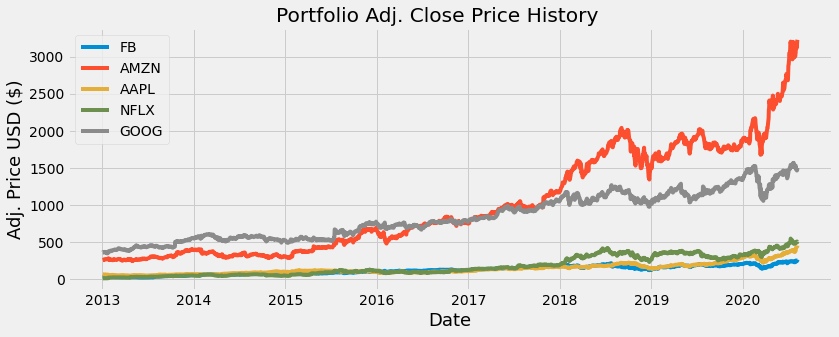

In [9]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()


In [10]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-07-31,0.081748,0.036961,0.104689,0.006340,-0.031663
2020-08-03,-0.006741,-0.016681,0.025198,0.019923,-0.005739
2020-08-04,-0.008454,0.008657,0.006678,0.022101,-0.006430


In [11]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117394,0.052770,0.042503,0.054672,0.048833
AMZN,0.052770,0.092740,0.036597,0.061643,0.046763
AAPL,0.042503,0.036597,0.077974,0.032360,0.037266
NFLX,0.054672,0.061643,0.032360,0.212070,0.048978
GOOG,0.048833,0.046763,0.037266,0.048978,0.065042


In [12]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05959957280966843

In [13]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24413023739321688

In [14]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.365581077018781

In [15]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 37.0%
Annual volatility/standard deviation/risk : 24.0%
Annual variance : 6.0%


In [2]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [17]:
# Portfolio Optimization 

# Calculate the expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)


In [18]:
mu

FB      0.354449
AMZN    0.379580
AAPL    0.288936
NFLX    0.584618
GOOG    0.220323
dtype: float64

In [19]:
S

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117394,0.052770,0.042503,0.054672,0.048833
AMZN,0.052770,0.092740,0.036597,0.061643,0.046763
AAPL,0.042503,0.036597,0.077974,0.032360,0.037266
NFLX,0.054672,0.061643,0.032360,0.212070,0.048978
GOOG,0.048833,0.046763,0.037266,0.048978,0.065042


In [21]:
#Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.12506), ('AMZN', 0.29877), ('AAPL', 0.26929), ('NFLX', 0.30688), ('GOOG', 0.0)])
Expected annual return: 41.5%
Annual volatility: 26.3%
Sharpe Ratio: 1.50


(0.41494859223353575, 0.26321803389728887, 1.5004617517493115)

In [23]:
0.12506 + 0.29877 + 0.26929 + 0.30688

1.0

In [26]:
# Get the discrete allocation of each share per stock 

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weigths = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation', allocation) # No. of shares you can buy 
print('Funds remaining: ${:.2f}'.format(leftover)) # Amount of many leftover after purchase of shares

Discrete allocation {'FB': 8.0, 'AMZN': 1.0, 'AAPL': 9.0, 'NFLX': 10.0}
Funds remaining: $461.47
